In [1]:
import pandas as pd

In [9]:
dt = pd.read_excel("fraud_detection_sample_data.xlsx")
dt.head()

,transaction_id,user_id,ip_address,device_id,transaction_type,transaction_time,transaction_amount,Transaction_id,fraud_status
0,TXN100000,U0433,166.186.169.69,DEV0099,purchase,2025-08-05 12:11:31,216.08,TXN100000,not fraud
1,TXN100001,U0133,175.241.151.7,DEV0131,purchase,2025-08-23 04:48:24,459.93,TXN100001,fraud
2,TXN100002,U0425,175.110.164.126,DEV0078,refund,2025-08-31 20:42:49,185.44,TXN100002,not fraud
3,TXN100003,U0457,50.9.161.156,DEV0056,purchase,2025-08-10 07:50:24,148.10,TXN100003,not fraud
4,TXN100004,U0387,48.8.75.189,DEV0025,purchase,2025-08-29 09:30:21,132.75,TXN100004,not fraud


In [13]:
dt.isnull().sum()

transaction_id        0
user_id               0
ip_address            0
device_id             0
transaction_type      0
transaction_time      0
transaction_amount    0
Transaction_id        0
fraud_status          0
dtype: int64

In [ ]:
dt.dtypes

transaction_id         object
user_id                object
ip_address             object
device_id              object
transaction_type       object
transaction_time       object
transaction_amount    float64
Transaction_id         object
fraud_status           object
dtype: object

In [19]:
dt["fraud_status"] = dt["fraud_status"].map({'fraud': 1, 'not fraud': 0})

In [20]:
dt

,transaction_id,user_id,ip_address,device_id,transaction_type,transaction_time,transaction_amount,Transaction_id,fraud_status
0,TXN100000,U0433,166.186.169.69,DEV0099,purchase,2025-08-05 12:11:31,216.08,TXN100000,0
1,TXN100001,U0133,175.241.151.7,DEV0131,purchase,2025-08-23 04:48:24,459.93,TXN100001,1
2,TXN100002,U0425,175.110.164.126,DEV0078,refund,2025-08-31 20:42:49,185.44,TXN100002,0
3,TXN100003,U0457,50.9.161.156,DEV0056,purchase,2025-08-10 07:50:24,148.10,TXN100003,0
4,TXN100004,U0387,48.8.75.189,DEV0025,purchase,2025-08-29 09:30:21,132.75,TXN100004,0
...,...,...,...,...,...,...,...,...,...
995,TXN100995,U0339,98.61.90.53,DEV0128,refund,2025-08-20 08:06:41,298.97,TXN100995,0
996,TXN100996,U0327,106.98.172.212,DEV0124,refund,2025-08-20 15:15:36,493.13,TXN100996,1
997,TXN100997,U0450,57.161.109.83,DEV0070,purchase,2025-08-03 22:53:52,18.93,TXN100997,0
998,TXN100998,U0351,155.143.204.186,DEV0160,refund,2025-08-31 05:26:30,143.08,TXN100998,0


In [21]:
dt.dtypes

transaction_id         object
user_id                object
ip_address             object
device_id              object
transaction_type       object
transaction_time       object
transaction_amount    float64
Transaction_id         object
fraud_status            int64
dtype: object

In [24]:
from sklearn.preprocessing import StandardScaler


In [30]:
ss = StandardScaler()
column_names = ["transaction_amount"]
dt[column_names] = ss.fit_transform(dt[column_names])

In [31]:
dt

,transaction_id,user_id,ip_address,device_id,transaction_type,transaction_time,transaction_amount,Transaction_id,fraud_status
0,TXN100000,U0433,166.186.169.69,DEV0099,purchase,2025-08-05 12:11:31,-0.253715,TXN100000,0
1,TXN100001,U0133,175.241.151.7,DEV0131,purchase,2025-08-23 04:48:24,1.469892,TXN100001,1
2,TXN100002,U0425,175.110.164.126,DEV0078,refund,2025-08-31 20:42:49,-0.470288,TXN100002,0
3,TXN100003,U0457,50.9.161.156,DEV0056,purchase,2025-08-10 07:50:24,-0.734218,TXN100003,0
4,TXN100004,U0387,48.8.75.189,DEV0025,purchase,2025-08-29 09:30:21,-0.842717,TXN100004,0
...,...,...,...,...,...,...,...,...,...
995,TXN100995,U0339,98.61.90.53,DEV0128,refund,2025-08-20 08:06:41,0.332177,TXN100995,0
996,TXN100996,U0327,106.98.172.212,DEV0124,refund,2025-08-20 15:15:36,1.704560,TXN100996,1
997,TXN100997,U0450,57.161.109.83,DEV0070,purchase,2025-08-03 22:53:52,-1.647231,TXN100997,0
998,TXN100998,U0351,155.143.204.186,DEV0160,refund,2025-08-31 05:26:30,-0.769701,TXN100998,0


In [32]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
#col = ['transaction_id', 'user_id', 'ip_address', 'device_id', 'transaction_type']
for col in ['transaction_id', 'user_id', 'ip_address', 'device_id', 'transaction_type']:
    dt[col] = le.fit_transform(dt[col])

In [37]:
dt.head()

,transaction_id,user_id,ip_address,device_id,transaction_type,transaction_time,transaction_amount,Transaction_id,fraud_status
0,0,379,286,97,0,2025-08-05 12:11:31,-0.253715,TXN100000,0
1,1,123,349,129,0,2025-08-23 04:48:24,1.469892,TXN100001,1
2,2,373,343,77,1,2025-08-31 20:42:49,-0.470288,TXN100002,0
3,3,402,855,55,0,2025-08-10 07:50:24,-0.734218,TXN100003,0
4,4,341,849,24,0,2025-08-29 09:30:21,-0.842717,TXN100004,0


In [38]:
dt.dtypes

transaction_id          int64
user_id                 int64
ip_address              int64
device_id               int64
transaction_type        int64
transaction_time       object
transaction_amount    float64
Transaction_id         object
fraud_status            int64
dtype: object

In [41]:
dt = dt.drop(['transaction_time', 'Transaction_id'], axis=1)

In [44]:
print(dt.head())
print(dt.dtypes)

   transaction_id  user_id  ip_address  device_id  transaction_type  \
0               0      379         286         97                 0   
1               1      123         349        129                 0   
2               2      373         343         77                 1   
3               3      402         855         55                 0   
4               4      341         849         24                 0   

   transaction_amount  fraud_status  
0           -0.253715             0  
1            1.469892             1  
2           -0.470288             0  
3           -0.734218             0  
4           -0.842717             0  
transaction_id          int64
user_id                 int64
ip_address              int64
device_id               int64
transaction_type        int64
transaction_amount    float64
fraud_status            int64
dtype: object


In [45]:
dt.isnull().sum()

transaction_id        0
user_id               0
ip_address            0
device_id             0
transaction_type      0
transaction_amount    0
fraud_status          0
dtype: int64

In [46]:
column_names = ['user_id', 'ip_address', 'device_id']
dt[column_names] = ss.fit_transform(dt[column_names])

In [47]:
dt.head()

,transaction_id,user_id,ip_address,device_id,transaction_type,transaction_amount,fraud_status
0,0,1.267219,-0.739586,0.035695,0,-0.253715,0
1,1,-0.732436,-0.521348,0.587763,0,1.469892,1
2,2,1.220352,-0.542132,-0.309348,1,-0.470288,0
3,3,1.446876,1.231489,-0.688895,0,-0.734218,0
4,4,0.970395,1.210704,-1.223711,0,-0.842717,0


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
input = dt[['transaction_id', 'user_id', 'ip_address', 'device_id', 'transaction_type', 'transaction_amount']]
output = dt['fraud_status']
def data_preprocessing(dt):
    x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)
    return x_train, x_test, y_train, y_test

In [67]:
def svm(x_train, x_test, y_train, y_test):
    svc = SVC(kernel='linear',random_state = 42)
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)
    return accuracy_score(y_test, y_pred)

def lr(x_train, x_test, y_train, y_test):
    lr = LogisticRegression(random_state = 42)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    return accuracy_score(y_test, y_pred)

def rf(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(random_state = 42)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    return accuracy_score(y_test, y_pred)

def knn(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [68]:
x_train,x_test,y_train,y_test = data_preprocessing(dt)
l = []
l.append(svm(x_train,x_test,y_train,y_test)*100)
l.append(lr(x_train,x_test,y_train,y_test)*100)
l.append(rf(x_train,x_test,y_train,y_test)*100)
l.append(knn(x_train,x_test,y_train,y_test)*100)
result = pd.DataFrame(l,columns=['Accuracy'],index=['SVM','Logistic Regression','Random Forest','KNN'])

c:\Users\ads2509026\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
result

,Accuracy
SVM,99.5
Logistic Regression,99.5
Random Forest,100.0
KNN,86.0


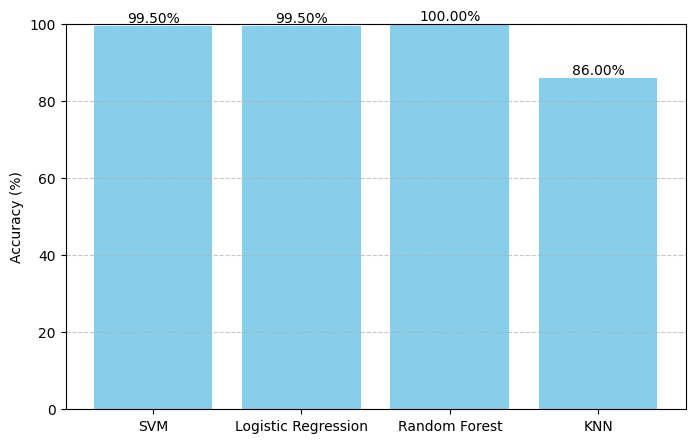

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(result.index, result['Accuracy'], color='skyblue')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
#plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of bars
for i, v in enumerate(result['Accuracy']):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()


In [84]:
import pickle

In [ ]:
# Save Model
models = {
    'svm': svm,
    'logistic_regression': lr,
    'random_forest': rf,
    'knn': knn
}

with open('all_models.pkl', 'wb') as f:
    pickle.dump(models, f)


In [ ]:
#Load Model
with open('all_models.pkl', 'rb') as f:
    models = pickle.load(f)

svm_model = models['svm']
lr_model = models['logistic_regression']
rf_model = models['random_forest']
knn_model = models['knn']


In [ ]:
# Save models
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)



In [101]:
#Load Model
with open('random_forest_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)